#                                                              MScFE Capstone Project



**Research Track**:    Chrispen Michael Mushore - (chrispenmushore@gmail.com)


**Practical (Code)**:     Moselane Peea – (peeamoselane@yahoo.com)



### Emerging Markets: Which financial ratios are best in identifying good buys?

Group: **34**
May 2020

### Problem statement
Investors are always looking for ways to determine the best stocks for a portfolio. There is always a question of whether the same methods of stocks selection applied in developed markets. Can the financial ratios utilised for developed markets hold the same significance in the emerging markets.
Considering the market imperfections, barriers to entry, government regulation, political risk and differences in financial reporting and other impediments in emerging markets, there is need to explore the necessity or lack of it to deviate from the normal methods that work in developed markets.
This can be addressed by investigating the financial ratios and techniques that actually work for identifying good buy in emerging markets.


**Ten Emerging companies we are going to use***

China Construction Bank Corporation (CICHY)
    
China Minsheng Banking Corp., Ltd. (1988.HK)

China Petroleum & Chemical Corporation (SNP)

China Life Insurance Company Limited (LFC)

CHINA MERCHANTS BANK CO LTD (CIHKY)

AGRICULTURAL BANK OF CHINA (ACGBY)

BANK OF CHINA LTD (BACHY)

INDUSTRIAL & COMMERCIAL BK OF CHINA (IDCBY)

PING AN INSURANCE(GROUP)CO.OF CHINA (PNGAY)

China Telecom Corp Ltd (CHA)

## Collecting stock prices

In [2]:
#import packages we need
from pandas_datareader import data
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#Define the instruments to download.
tickers = ['CICHY', '1988.HK', 'SNP','LFC','CIHKY','ACGBY','BACHY','IDCBY','PNGAY','CHA']

# We would like all available data from 05/05/2015 until 05/05/2020.
start_date = '2015-05-05'
end_date = '2020-05-05'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', 'google', start_date, end_date)

NotImplementedError: data_source='google' is not implemented

In [ ]:
panel_data.to_frame().head(9)

## Collecting Financial Statements

In [15]:
def selectquote(quote):
    r= requests.get(f"https://financialmodelingprep.com/api/v3/income-statements/CHA")
    r = r.json()
    
    stock = r['financials']
    stock = pd.DataFrame.from_dict(stock)
    stock = stock.T

We store the response from our get request in a variable that we then convert into a dictionary. From our dictionary, 
we can easily convert it to a Pandas DataFrame in order to work with it and perform some basic data manipulation. We 
will rename the DataFrame columns, drop some of the useless data and convert our object column to numbers.
Finally, we will divide each item of our income statement by the revenue.

In [16]:
    stock.columns = stock.iloc[0]
    stock.reset_index(inplace=True)
    stock = stock.iloc[:,0:2]
    stock.rename(columns={ stock.columns[1]: quote }, inplace = True)
    cols = stock.columns.drop('index')
    stock[cols] = stock[cols].apply(pd.to_numeric, errors='coerce')
    stock = stock.iloc[1:,]
    
    #Divide whole dataframe for first row (i.e. revenue)
    stock[quote] = (stock[quote]/stock.iloc[0,1])
    
    #Format numbers as Percentage
    stock[quote] = pd.Series(["{0:.2f}%".format(val * 100) for val in stock[quote]], index = stock.index)
    return stock

NameError: name 'stock' is not defined

In the last part of the code, in order to get data for more than one company and enable comparability, we 
will loop through a list of stocks that we want to analyse and will merge 
each of them into a combine Pandas DataFrame that I have called X.

In [ ]:
listofstocks = ['CICHY', '1988.HK', 'SNP','LFC','CIHKY','ACGBY','BACHY','IDCBY','PNGAY']
x = selectquote('CHA')
for item in listofstocks:
    y = selectquote(item)
    x = x.merge(y,on='index')

In [17]:
from bs4 import BeautifulSoup
import urllib.request as ur

**Processing**

Here is a simple trick you can flexibly adjust the stock symbol and plug it into the URL link. 
It will come in handy later if you want to extract hundreds of company’s financial statements.

In [19]:
# Enter a stock symbol
index= 'CICHY', '1988.HK', 'SNP','LFC','CIHKY','ACGBY','BACHY','IDCBY','PNGAY','CHA'

# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index + '/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

TypeError: can only concatenate str (not "tuple") to str

open the link and read it into a proper format called lxml. Simple enough.

In [44]:
read_data = ur.urlopen(url_is).read() 
soup_is= BeautifulSoup(read_data,'lxml')

In [45]:
soup_is

<!DOCTYPE html>
<html class="NoJs featurephone" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>iShares MSCI Emerging Index Fun (EEM) Stock Price, Quote, History &amp; News - Yahoo Finance</title><meta content="EEM, iShares MSCI Emerging Index Fun, EEM stock chart, iShares MSCI Emerging Index Fun stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="90376669494" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest iShares MSCI Emerging Index Fun (EEM) stock quote, history, news and other vital information to help you with your stock trading and investing." lang="en-US" name="description"/><meta content="g

**Data Manipulation**

But how do know which classes the relevant data are stored in?
After a few searches, we know that they are stored in“div”, we can create an empty list 
and use a for loop to find all elements and append them to the list.

In [46]:
ls= [] # Create empty list
for l in soup_is.find_all(‘div’): 
  #Find all data structure that is ‘div’
  ls.append(l.string) # add each element one by one to the list
 
ls = [e for e in ls if e not in (‘Operating Expenses’,’Non-recurring Events’)] # Exclude those columns

SyntaxError: invalid character in identifier (<ipython-input-46-d4a73bfa1ba1>, line 2)

## Computing Financial Ratios 

In [22]:
# Get company ratios using request package
company = 'data'   
financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{company}")
financial_ratios = financial_ratios.json()

In [23]:
ratios = financial_ratios['ratios'][0]
ratios

{'date': '2018-12-31',
 'investmentValuationRatios': {'priceBookValueRatio': '10.388665735976756',
  'priceToBookRatio': '10.388665735976756',
  'priceToSalesRatio': '9.113928707441541',
  'priceEarningsRatio': '-136.67604371641443',
  'receivablesTurnover': '4.89425280539517',
  'priceToFreeCashFlowsRatio': '78.43423284916202',
  'priceToOperatingCashFlowsRatio': '68.06766664942856',
  'priceCashFlowRatio': '68.06766664942856',
  'priceEarningsToGrowthRatio': '60.86341261249599',
  'priceSalesRatio': '9.113928707441541',
  'dividendYield': '-0',
  'enterpriseValueMultiple': '-183.33419369185722',
  'priceFairValue': '10.388665735976756'},
 'profitabilityIndicatorRatios': {'ebitperRevenue': '-0.07768108766852007',
  'niperEBT': '1.071858870014052',
  'ebtperEBIT': '0.8008668620263178',
  'grossProfitMargin': '0.8765536390641121',
  'operatingProfitMargin': '-0.07768108766852007',
  'pretaxProfitMargin': '-0.06221220891987896',
  'netProfitMargin': '-0.06668270795393957',
  'effectiveTa

In [24]:
profit_ratios = ratios['profitabilityIndicatorRatios']
profit_ratios

{'ebitperRevenue': '-0.07768108766852007',
 'niperEBT': '1.071858870014052',
 'ebtperEBIT': '0.8008668620263178',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [25]:
# Create a function that will get profit ratios when given a stock 
def get_profit_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    profit_ratios = ratios['profitabilityIndicatorRatios']
    
    return profit_ratios

In [26]:
# Check the function works
get_profit_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'niperEBT': '1.071858870014052',
 'ebtperEBIT': '0.8008668620263178',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [27]:
cash_flow = ratios['cashFlowIndicatorRatios']
cash_flow

{'operatingCashFlowPerShare': '1.8721076580501501',
 'freeCashFlowPerShare': '1.624673250072611',
 'cashPerShare': '12.372652241262465',
 'payoutRatio': '-0.0',
 'receivablesTurnover': '4.89425280539517',
 'operatingCashFlowSalesRatio': '0.1338951246027185',
 'freeCashFlowOperatingCashFlowRatio': '0.8678311009980866',
 'cashFlowCoverageRatios': '',
 'shortTermCoverageRatios': '9.487059977922238',
 'capitalExpenditureCoverageRatios': '7.566076494179791',
 'dividendpaidAndCapexCoverageRatios': '7.5660764941798',
 'dividendPayoutRatio': ''}

In [28]:
# Create a function that will get cash flow ratios when given a stock 
def get_cashflow_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    cash_flow = ratios['cashFlowIndicatorRatios']
    
    return profit_ratios

In [29]:
# Check the function works
get_cashflow_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'niperEBT': '1.071858870014052',
 'ebtperEBIT': '0.8008668620263178',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

## Feature Selection
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Benefits of performing feature selection before modeling data

**· Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

**· Improves Accuracy**: Less misleading data means modeling accuracy improves.

**· Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

### 1. Univariate Selection

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: could not convert string to float: '2015-04-07'

### 2. Feature Importance

In [15]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\SABAdmin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '2015-04-07'

### 3. Correlation Matrix with Heatmap

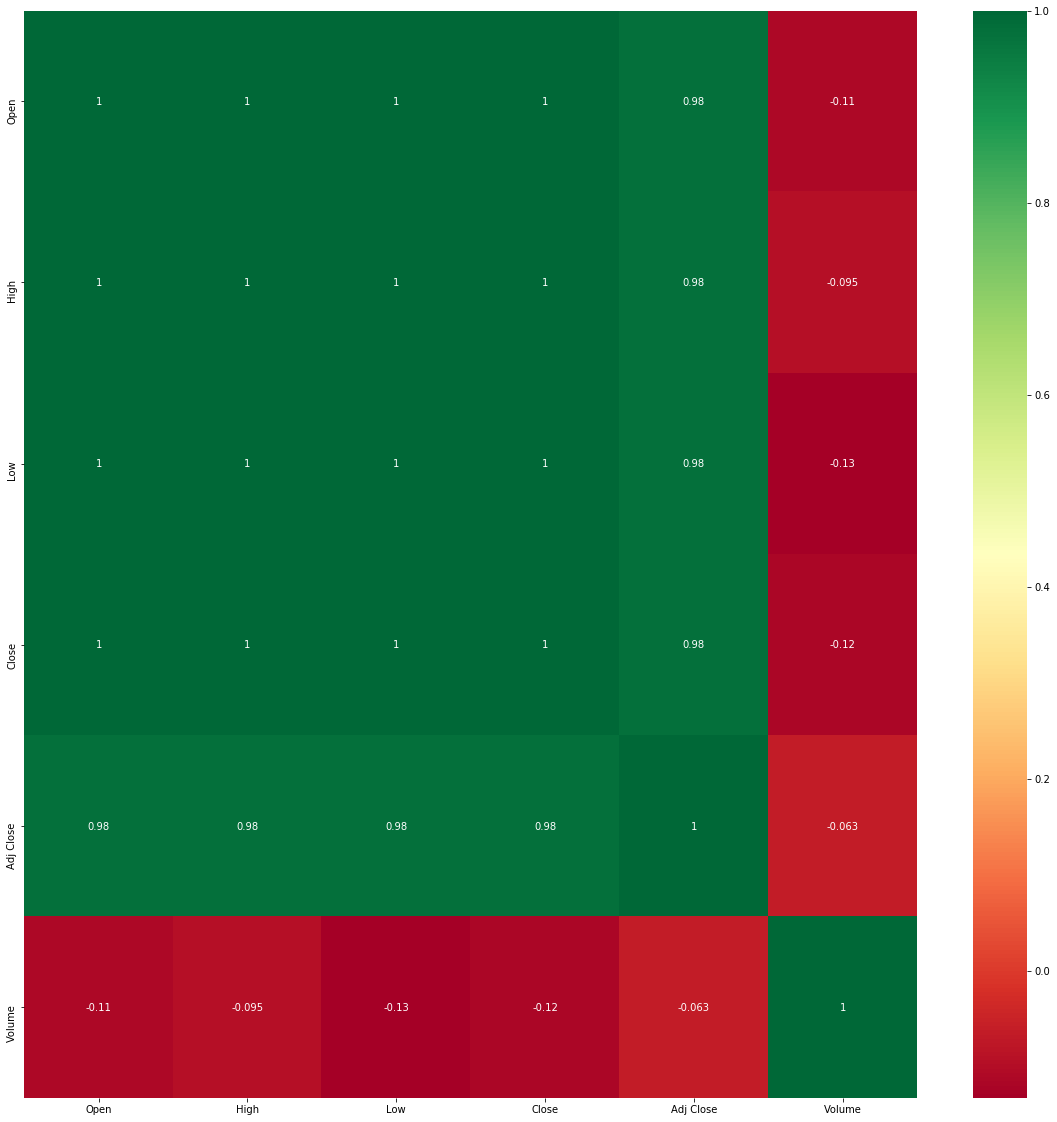

In [16]:
import seaborn as sns


X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Predict Stock Prices

### Hierarchical Clustering with scikit-learn

In [5]:
data.shape

(1260, 7)

In [7]:
data = data.iloc[:, 3:5].values

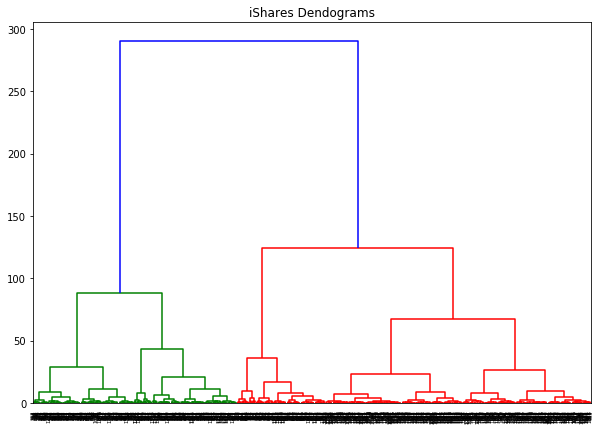

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("iShares Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In the script above we import the hierarchy class of the **scipy.cluster** library as **shc**. The hierarchy class has a 
**dendrogram** method which takes the value returned by the **linkage** method of the same class. The **linkage** method takes 
the dataset and the method to minimize distances as parameters. We use 'ward' as the **method** since it minimizes then 
variants of distances between the clusters

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. 
To do so we will again use the AgglomerativeClustering **class of the sklearn**.cluster library.

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 4, 4, ..., 0, 0, 0], dtype=int64)

As a final step, let's plot the clusters to see how actually our data has been clustered:

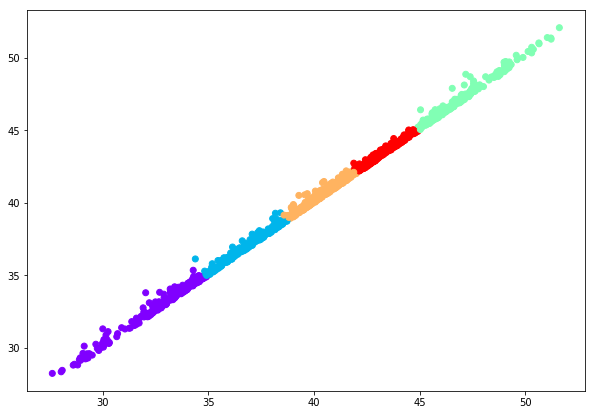

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

As we can see the data points in the form of five clusters.